# Calculation of aco_angle_1 from low-level data

This code calculates aco_angle_1 from the pion 4-vectors, using formulas (4), (5) and (6) from the CMS CP paper.

In [1]:
# start with some setup
!pip install --user uproot
import sys
sys.path.append("/eos/home-m/dwinterb/.local/lib/python2.7/site-packages")

In [4]:
#!pip install #pyroot
!pip install pylorentz

  Created wheel for pylorentz: filename=pylorentz-0.3.3-py3-none-any.whl size=12106 sha256=8e081cb99078047c0c689685d4104931ee78c595896c7f9200762c9811ae11e3
  Stored in directory: c:\users\krist\appdata\local\pip\cache\wheels\86\fe\e7\2dc3c29efdd107b959a44f9cb42f8ec1d8d730c03962d5fba4
Successfully built pylorentz


In [1]:
import uproot 
import numpy as np
import pandas as pd
#import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
#from ROOT import TLorentzVector
from pylorentz import Momentum4

In [2]:
# read data files
tree_tt = uproot.open("C:\\Users\\krist\\Downloads\\MVAFILE_AllHiggs_tt.root")["ntuple"]
#tree_et = uproot.open("/eos/user/k/kgalambo/SWAN_projects/Masters_CP_Kristof_2/MVAFILE_AllHiggs_et.root")["ntuple"]
#tree_mt = uproot.open("/eos/user/k/kgalambo/SWAN_projects/Masters_CP_Kristof_2/MVAFILE_AllHiggs_mt.root")["ntuple"]

In [3]:
variables = [
    "wt_cp_sm", "wt_cp_ps", "wt_cp_mm", "rand",
    "aco_angle_1", "aco_angle_6", "aco_angle_5", "aco_angle_7", 
    "mva_dm_1", "mva_dm_2",
    "tau_decay_mode_1", "tau_decay_mode_2",
     "ip_x_1", "ip_y_1", "ip_z_1", "ip_x_2", "ip_y_2", "ip_z_2", # ignore impact parameter for now
    "sv_x_1", "sv_y_1", "sv_z_1", "sv_x_2", "sv_y_2", "sv_z_2",
    "pi_px_1", "pi_py_1", "pi_pz_1", "pi_E_1",
    "pi_px_2", "pi_py_2", "pi_pz_2", "pi_E_2",
    "pi0_px_1", "pi0_py_1", "pi0_pz_1", "pi0_E_1",
    "pi0_px_2", "pi0_py_2", "pi0_pz_2", "pi0_E_2",
    "pi2_px_1", "pi2_py_1", "pi2_pz_1", "pi2_E_1",
    "pi2_px_2", "pi2_py_2", "pi2_pz_2", "pi2_E_2",
    "pi3_px_1", "pi3_py_1", "pi3_pz_1", "pi3_E_1",
    "pi3_px_2", "pi3_py_2", "pi3_pz_2", "pi3_E_2",
    "y_1_1", "y_1_2"
]

In [4]:
# WARNING! This line takes a long time
df = tree_tt.pandas.df(variables)

In [5]:
df_1 = df[
      (df["tau_decay_mode_1"] == 1) 
    & (df["tau_decay_mode_2"] == 1) 
    & (df["mva_dm_1"] == 1) 
    & (df["mva_dm_2"] == 1)
    # comment some selections to help with stats
    #& (df["deepTauVsJets_medium_1"] > 0.5) 
    #& (df["deepTauVsEle_vvloose_1"] > 0.5)
    #& (df["deepTauVsMu_vloose_1"] > 0.5)
    #& (df["deepTauVsJets_medium_2"] > 0.5) 
    #& (df["deepTauVsEle_vvloose_2"] > 0.5)
    #& (df["deepTauVsMu_vloose_2"] > 0.5)
    #& (df["trg_doubletau"] > 0.5)
]

df_1 = df_1.drop(["mva_dm_1", "mva_dm_2", "tau_decay_mode_1", "tau_decay_mode_2"], axis=1).reset_index(drop=True)

df_ps = df_1[
      (df_1["rand"]<df_1["wt_cp_ps"]/2)
]

df_sm = df_1[
      (df_1["rand"]<df_1["wt_cp_sm"]/2)
]


In [6]:
df_rhoa1 = df[(df['mva_dm_1']==1) & (df['mva_dm_2']==10) & (df["tau_decay_mode_1"] == 1)]

df_rhoa1 = df_rhoa1.drop(["mva_dm_1", "mva_dm_2", "tau_decay_mode_1", "tau_decay_mode_2"], axis=1).reset_index(drop=True)

df_rhoa1_ps = df_rhoa1[
      (df_rhoa1["rand"]<df_rhoa1["wt_cp_ps"]/2)
]

df_rhoa1_sm = df_rhoa1[
      (df_rhoa1["rand"]<df_rhoa1["wt_cp_sm"]/2)
]

In [7]:
aco_1_sm = df_sm['aco_angle_1']
aco_1_ps = df_ps['aco_angle_1']
aco_6_sm = df_sm['aco_angle_6']
aco_6_ps = df_ps['aco_angle_6']
aco_5_sm = df_sm['aco_angle_5']
aco_5_ps = df_ps['aco_angle_5']
aco_7_sm = df_sm['aco_angle_7']
aco_7_ps = df_ps['aco_angle_7']

In [8]:
aco_1_sm_rhoa1 = df_rhoa1_sm['aco_angle_1']
aco_1_ps_rhoa1 = df_rhoa1_ps['aco_angle_1']
aco_6_sm_rhoa1 = df_rhoa1_sm['aco_angle_6']
aco_6_ps_rhoa1 = df_rhoa1_ps['aco_angle_6']
aco_5_sm_rhoa1 = df_rhoa1_sm['aco_angle_5']
aco_5_ps_rhoa1 = df_rhoa1_ps['aco_angle_5']
aco_7_sm_rhoa1 = df_rhoa1_sm['aco_angle_7']
aco_7_ps_rhoa1 = df_rhoa1_ps['aco_angle_7']

In [9]:
# OLD VERSION!!!
def calculate_aco_angles_old(dataset):
    angles = []
    for i in range(len(dataset)):
        px3 = dataset["pi_px_1"].iloc[i]
        py3 = dataset["pi_py_1"].iloc[i]
        pz3 = dataset["pi_pz_1"].iloc[i]
        E3 = dataset["pi_E_1"].iloc[i]
        px4 = dataset["pi_px_2"].iloc[i]
        py4 = dataset["pi_py_2"].iloc[i]
        pz4 = dataset["pi_pz_2"].iloc[i]
        E4 = dataset["pi_E_2"].iloc[i]
        p3 = Momentum4(E3, px3, py3, pz3)
        p4 = Momentum4(E4, px4, py4, pz4)
        cm = p3 + p4

        px1 = dataset["pi0_px_1"].iloc[i]
        py1 = dataset["pi0_py_1"].iloc[i]
        pz1 = dataset["pi0_pz_1"].iloc[i]
        E1 = dataset["pi0_E_1"].iloc[i]
        px2 = dataset["pi0_px_2"].iloc[i]
        py2 = dataset["pi0_py_2"].iloc[i]
        pz2 = dataset["pi0_pz_2"].iloc[i]
        E2 = dataset["pi0_E_2"].iloc[i]
        p1 = Momentum4(E1, px1, py1, pz1)
        p2 = Momentum4(E2, px2, py2, pz2)
        
        y1 = dataset["y_1_1"].iloc[i]
        y2 = dataset["y_1_2"].iloc[i]

        p3 = p3.boost_particle(-cm)
        p4 = p4.boost_particle(-cm)
        p1 = p1.boost_particle(-cm)
        p2 = p2.boost_particle(-cm)

        def unit(vect):
            return vect / np.linalg.norm(vect)
        
        n1 = p1[1:] - np.dot(p1[1:], unit(p3[1:])) * unit(p3[1:])
        n2 = p2[1:] - np.dot(p2[1:], unit(p4[1:])) * unit(p4[1:])
        n1 = unit(n1)
        n2 = unit(n2)

        angle = np.arccos(np.dot(n1, n2))
        sign = np.dot(unit(p4[1:]), np.cross(n1, n2))

        # shift 1
        if sign < 0:
            angle = 2 * np.pi - angle

        # shift 2
        if y1*y2 < 0:
            if angle < np.pi:
                angle += np.pi
            else:
                angle -= np.pi

        angles.append(angle)

        if i%100000==0:
            print('finished element', i)
            
    return angles

In [52]:
def calculate_aco_angles(dataset, which_aco_angle=1):
        pi_1 = dataset[['pi_E_1', 'pi_px_1', 'pi_py_1', 'pi_pz_1']].to_numpy()
        pi_2 = dataset[['pi_E_2', 'pi_px_2', 'pi_py_2', 'pi_pz_2']].to_numpy()
        pi0_1 = dataset[['pi0_E_1', 'pi0_px_1', 'pi0_py_1', 'pi0_pz_1']].to_numpy()
        pi0_2 = dataset[['pi0_E_2', 'pi0_px_2', 'pi0_py_2', 'pi0_pz_2']].to_numpy()
        
        ip_1 = dataset[["ip_x_1", "ip_y_1", "ip_z_1"]].to_numpy()
        ip_2 = dataset[["ip_x_2", "ip_y_2", "ip_z_2"]].to_numpy()
        zeros_1 = np.reshape(np.zeros(len(ip_1)), (-1, 1))
        zeros_2 = np.reshape(np.zeros(len(ip_2)), (-1, 1))
        ip_1 = np.concatenate([zeros_1, ip_1], axis=1)
        ip_2 = np.concatenate([zeros_2, ip_2], axis=1)
        
        y1 = dataset['y_1_1'].to_numpy()
        y2 = dataset['y_1_2'].to_numpy()
        
        p3 = Momentum4(pi_1[:, 0], pi_1[:, 1], pi_1[:, 2], pi_1[:, 3]) # p3 = charged pion 1
        p4 = Momentum4(pi_2[:, 0], pi_2[:, 1], pi_2[:, 2], pi_2[:, 3]) # p4 = charged pion 2
        
        if which_aco_angle == 1:
            p1 = Momentum4(pi0_1[:, 0], pi0_1[:, 1], pi0_1[:, 2], pi0_1[:, 3]) # p1 = neutral pion 1
            p2 = Momentum4(pi0_2[:, 0], pi0_2[:, 1], pi0_2[:, 2], pi0_2[:, 3]) # p2 = neutral pion 2
        elif which_aco_angle == 6:
            p1 = Momentum4(ip_1[:, 0], ip_1[:, 1], ip_1[:, 2], ip_1[:, 3]) # p1 = impact parameter 1
            p2 = Momentum4(ip_2[:, 0], ip_2[:, 1], ip_2[:, 2], ip_2[:, 3]) # p2 = impact parameter 2
        elif which_aco_angle == 5:
            p1 = Momentum4(ip_1[:, 0], ip_1[:, 1], ip_1[:, 2], ip_1[:, 3]) # p1 = impact parameter 1
            p2 = Momentum4(pi0_2[:, 0], pi0_2[:, 1], pi0_2[:, 2], pi0_2[:, 3]) # p2 = neutral pion 2
        elif which_aco_angle == 7:
            p1 = Momentum4(pi0_1[:, 0], pi0_1[:, 1], pi0_1[:, 2], pi0_1[:, 3]) # p1 = neutral pion 1
            p2 = Momentum4(ip_2[:, 0], ip_2[:, 1], ip_2[:, 2], ip_2[:, 3]) # p2 = impact parameter 2
            
        elif which_aco_angle == 'rhoa1-1': # first a few guessings (I didn't know what this was), but then I have a result with pi0_1, pi2_2, pi_1, pi_2
            # this gives a good distribution, but no separation between sm and ps:
            #p1 = Momentum4(ip_1[:, 0], ip_1[:, 1], ip_1[:, 2], ip_1[:, 3]) # p1 = impact parameter 1
            #p2 = Momentum4(ip_2[:, 0], ip_2[:, 1], ip_2[:, 2], ip_2[:, 3]) # p2 = impact parameter 2
            
            # this gives a flat distribution
            #p1 = Momentum4(pi0_1[:, 0], pi0_1[:, 1], pi0_1[:, 2], pi0_1[:, 3]) # p1 = neutral pion 1
            #p2 = Momentum4(ip_2[:, 0], ip_2[:, 1], ip_2[:, 2], ip_2[:, 3]) # p2 = impact parameter 2
            
            # this gives a distribution similar to given aco_angle_1 for rho-a1 channel
            pi2_1 = dataset[['pi2_E_1', 'pi2_px_1', 'pi2_py_1', 'pi2_pz_1']].to_numpy() # empty!!!
            pi2_2 = dataset[['pi2_E_2', 'pi2_px_2', 'pi2_py_2', 'pi2_pz_2']].to_numpy()
            p1 = Momentum4(pi0_1[:, 0], pi0_1[:, 1], pi0_1[:, 2], pi0_1[:, 3]) # p1 = neutral pion 1
            #p1 = Momentum4(pi2_1[:, 0], pi2_1[:, 1], pi2_1[:, 2], pi2_1[:, 3]) # second charged pion 1 - this is empty!
            p2 = Momentum4(pi2_2[:, 0], pi2_2[:, 1], pi2_2[:, 2], pi2_2[:, 3]) # p2 = second charged pion 2
            
        elif which_aco_angle == 'rhoa1-2':  # first a few guessings (I didn't know what this was), but then I have a result with pi0_1, pi2_2+pi3_2, pi_1, pi_2
            pi2_1 = dataset[['pi2_E_1', 'pi2_px_1', 'pi2_py_1', 'pi2_pz_1']].to_numpy() # empty!!!
            pi2_2 = dataset[['pi2_E_2', 'pi2_px_2', 'pi2_py_2', 'pi2_pz_2']].to_numpy()
            pi2 = Momentum4(pi2_2[:, 0], pi2_2[:, 1], pi2_2[:, 2], pi2_2[:, 3]) # pi2 = second charged pion 2
            pi0 = Momentum4(pi0_1[:, 0], pi0_1[:, 1], pi0_1[:, 2], pi0_1[:, 3]) # pi0 = neutral pion 1
            pi3_1 = dataset[['pi3_E_1', 'pi3_px_1', 'pi3_py_1', 'pi3_pz_1']].to_numpy() # empty!!!
            pi3_2 = dataset[['pi3_E_2', 'pi3_px_2', 'pi3_py_2', 'pi3_pz_2']].to_numpy()
            pi3 = Momentum4(pi3_2[:, 0], pi3_2[:, 1], pi3_2[:, 2], pi3_2[:, 3]) # pi3 = third carged pion 3
            
            # this gives 3 spikes at 0, pi and 2*pi
            #p1 = pi2 + p4
            #p2 = pi2
            
            # this gives a flat distribution
            #p1 = p3 + p4
            #p2 = pi2
            
            # this gives3 spikes at 0, pi and 2*pi
            #p1 = pi2 + p3
            #p2 = pi2
            
            # this gives two y+ and x+- shifted parabolas
            #p1 = pi2
            #p2 = pi3
            
            # this gives a distribution similar to given aco_angle_1 for rho-a1 channel
            p1 = pi0
            p2 = pi2 + pi3
            
        elif which_aco_angle == 'rhoa1-3': # this is some new aco_angle
            pi2_2 = dataset[['pi2_E_2', 'pi2_px_2', 'pi2_py_2', 'pi2_pz_2']].to_numpy()
            pi3_2 = dataset[['pi3_E_2', 'pi3_px_2', 'pi3_py_2', 'pi3_pz_2']].to_numpy()
            pi0 = Momentum4(pi0_1[:, 0], pi0_1[:, 1], pi0_1[:, 2], pi0_1[:, 3]) # pi0 = neutral pion 1
            pi2 = Momentum4(pi2_2[:, 0], pi2_2[:, 1], pi2_2[:, 2], pi2_2[:, 3]) # pi2 = second charged pion 2
            pi3 = Momentum4(pi3_2[:, 0], pi3_2[:, 1], pi3_2[:, 2], pi3_2[:, 3]) # pi3 = third carged pion 3
            
            # this gives something good ;-)
            p1 = pi0
            p2 = pi2 + p3
            p3 = pi3 + p3
            
        # is there a better method than just guessing?
        
        elif which_aco_angle == 'rhoa1-4': # this is after a clever thought process
            pi2_2 = dataset[['pi2_E_2', 'pi2_px_2', 'pi2_py_2', 'pi2_pz_2']].to_numpy()
            pi3_2 = dataset[['pi3_E_2', 'pi3_px_2', 'pi3_py_2', 'pi3_pz_2']].to_numpy()
            pi0 = Momentum4(pi0_1[:, 0], pi0_1[:, 1], pi0_1[:, 2], pi0_1[:, 3]) # pi0 = neutral pion 1
            pi2 = Momentum4(pi2_2[:, 0], pi2_2[:, 1], pi2_2[:, 2], pi2_2[:, 3]) # pi2 = second charged pion 2
            pi3 = Momentum4(pi3_2[:, 0], pi3_2[:, 1], pi3_2[:, 2], pi3_2[:, 3]) # pi3 = third carged pion 3
            # p3 = pi_1
            # p4 = pi_2
            
            # this gives something good, I think a new aco_angle
            p1 = p4
            p2 = pi0
            p3 = p3 + pi2
            p4 = pi3
            
        elif which_aco_angle == 'rhoa1-5': # this is the same though process as rhoa1-4, but I think it's corrected, because particle 1 and particle 3 are the same composite particle
            pi2_2 = dataset[['pi2_E_2', 'pi2_px_2', 'pi2_py_2', 'pi2_pz_2']].to_numpy()
            pi3_2 = dataset[['pi3_E_2', 'pi3_px_2', 'pi3_py_2', 'pi3_pz_2']].to_numpy()
            pi0 = Momentum4(pi0_1[:, 0], pi0_1[:, 1], pi0_1[:, 2], pi0_1[:, 3]) # pi0 = neutral pion 1
            pi2 = Momentum4(pi2_2[:, 0], pi2_2[:, 1], pi2_2[:, 2], pi2_2[:, 3]) # pi2 = second charged pion 2
            pi3 = Momentum4(pi3_2[:, 0], pi3_2[:, 1], pi3_2[:, 2], pi3_2[:, 3]) # pi3 = third carged pion 3
            # p3 = pi_1
            # p4 = pi_2
            
            # this gives?
            #p1 = p4
            #p2 = p3 + pi2
            #p3 = pi0
            #p4 = pi3
            
            # this gives: good distr for the p4+pi3 combination, but bad distr for the p4+pi2 neutral rho
            p1 = p3
            p2 = p4 + pi2
            p3 = pi0
            p4 = pi3
            
        elif which_aco_angle == '5-switched':
            p2 = Momentum4(ip_1[:, 0], ip_1[:, 1], ip_1[:, 2], ip_1[:, 3]) # p2 = impact parameter 1
            p1 = Momentum4(pi0_2[:, 0], pi0_2[:, 1], pi0_2[:, 2], pi0_2[:, 3]) # p1 = neutral pion 2
            
        elif which_aco_angle == '5-double-switched':
            p2 = Momentum4(ip_1[:, 0], ip_1[:, 1], ip_1[:, 2], ip_1[:, 3]) # p2 = impact parameter 1
            p1 = Momentum4(pi0_2[:, 0], pi0_2[:, 1], pi0_2[:, 2], pi0_2[:, 3]) # p1 = neutral pion 2
            p3, p4 = p4, p3
            
        elif which_aco_angle == '6-sv':
            #sv_1 = dataset[["sv_x_1", "sv_y_1", "sv_z_1"]].to_numpy()
            sv_2 = dataset[["sv_x_2", "sv_y_2", "sv_z_2"]].to_numpy()
            #zeros_1 = np.reshape(np.zeros(len(sv_1)), (-1, 1))
            zeros_2 = np.reshape(np.zeros(len(sv_2)), (-1, 1))
            #sv_1 = np.concatenate([zeros_1, sv_1], axis=1)
            sv_2 = np.concatenate([zeros_2, sv_2], axis=1)
            
            p1 = Momentum4(ip_1[:, 0], ip_1[:, 1], ip_1[:, 2], ip_1[:, 3]) # p1 = sv 1
            p2 = Momentum4(sv_2[:, 0], sv_2[:, 1], sv_2[:, 2], sv_2[:, 3]) # p2 = sv 2
        
        elif which_aco_angle == 'rhoa1-Danny':
            pi2_2 = dataset[['pi2_E_2', 'pi2_px_2', 'pi2_py_2', 'pi2_pz_2']].to_numpy()
            pi3_2 = dataset[['pi3_E_2', 'pi3_px_2', 'pi3_py_2', 'pi3_pz_2']].to_numpy()
            pi0 = Momentum4(pi0_1[:, 0], pi0_1[:, 1], pi0_1[:, 2], pi0_1[:, 3]) # pi0 = neutral pion 1
            pi2 = Momentum4(pi2_2[:, 0], pi2_2[:, 1], pi2_2[:, 2], pi2_2[:, 3]) # pi2 = second charged pion 2
            pi3 = Momentum4(pi3_2[:, 0], pi3_2[:, 1], pi3_2[:, 2], pi3_2[:, 3]) # pi3 = third carged pion 3
            # p3 = pi_1
            # p4 = pi_2
            
            # this gives?
            p1 = pi0
            p2 = p4
            #p3 = p3
            p4 = pi2     
            #raise Exception('I don\'t know which particles are which')
            
        else:
            print('which_aco_angle not understood!')
            
        #zmf = p3 + p4 + p1 + p2
        zmf = p3 + p4
        #zmf = p1 + p2
        p3 = p3.boost_particle(-zmf)
        p4 = p4.boost_particle(-zmf)
        p1 = p1.boost_particle(-zmf)
        p2 = p2.boost_particle(-zmf)
        
        # the mass of the neutral rho
        #mass_neutral_rho = (p2[0, :]**2 - p2[1, :]**2 - p2[2, :]**2 - p2[3, :]**2)**0.5
        #plt.hist(mass_neutral_rho, bins=50, alpha=0.5)
        #plt.title('mass of the neutral rho = pi_2+pi2_2')
        
        return calc_aco_angles(p1[:].T, p2[:].T, p3[:].T, p4[:].T, y1, y2)

        
def calc_aco_angles(pp1, pp2, pp3, pp4, yy1, yy2):
    angles = []
    for i in range(len(pp1)):
        p3 = pp3[i]
        p4 = pp4[i]
        p1 = pp1[i]
        p2 = pp2[i]
        y1 = yy1[i]
        y2 = yy2[i]

        def unit(vect):
            return vect / np.linalg.norm(vect)
        
        n1 = p1[1:] - np.dot(p1[1:], unit(p3[1:])) * unit(p3[1:])
        n2 = p2[1:] - np.dot(p2[1:], unit(p4[1:])) * unit(p4[1:])
        n1 = unit(n1)
        n2 = unit(n2)

        angle = np.arccos(np.dot(n1, n2))
        sign = np.dot(unit(p4[1:]), np.cross(n1, n2))

        # shift 1
        if sign < 0:
            angle = 2 * np.pi - angle

        # shift 2
        if y1*y2 < 0:
            if angle < np.pi:
                angle += np.pi
            else:
                angle -= np.pi

        angles.append(angle)

        if i%100000==0:
            print('finished element', i)
            
    return angles

In [11]:
def filter_acos(arr):
    return np.array([x for x in arr if x>=0 and x<=2*np.pi])

# 1. Rho-rho Channel

### aco_angle_1

In [53]:
sm_aco = calculate_aco_angles(df_sm)
ps_aco = calculate_aco_angles(df_ps)

finished element 0
finished element 100000
finished element 200000
finished element 300000
finished element 0
finished element 100000
finished element 200000
finished element 300000


Text(0.5, 1.0, 'calculated aco_angle_1')

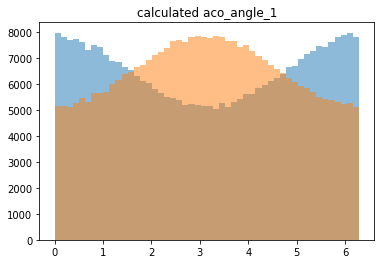

In [54]:
fig, ax = plt.subplots()
ax.hist(ps_aco, bins=50, alpha=0.5)
ax.hist(sm_aco, bins=50, alpha=0.5)
plt.title('calculated aco_angle_1')

Text(0.5, 1.0, 'given aco_angle_1')

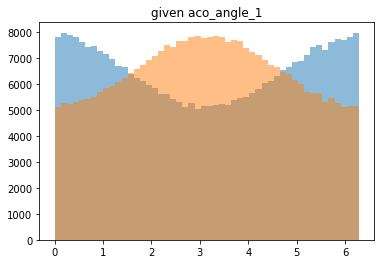

In [66]:
fig, ax = plt.subplots()
ax.hist(aco_1_ps.to_numpy(), bins=50, alpha=0.5)
ax.hist(aco_1_sm.to_numpy(), bins=50, alpha=0.5)
plt.title('given aco_angle_1')

## Other aco_angles

### aco_angle_6

In [59]:
sm_aco_6 = calculate_aco_angles(df_sm, which_aco_angle=6)
ps_aco_6 = calculate_aco_angles(df_ps, which_aco_angle=6)

finished element 0
finished element 100000
finished element 200000
finished element 300000
finished element 0
finished element 100000
finished element 200000
finished element 300000


Text(0.5, 1.0, 'calculated aco_angle_6')

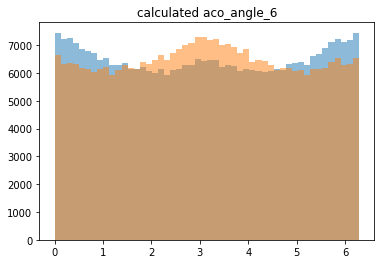

In [60]:
fig, ax = plt.subplots()
ax.hist(ps_aco_6, bins=50, alpha=0.5)
ax.hist(sm_aco_6, bins=50, alpha=0.5)
plt.title('calculated aco_angle_6')

Text(0.5, 1.0, 'given aco_angle_6')

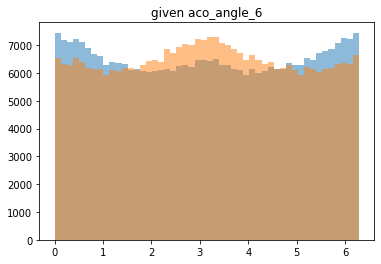

In [84]:
fig, ax = plt.subplots()
ax.hist(filter_acos(aco_6_ps.to_numpy()), bins=50, alpha=0.5)
ax.hist(filter_acos(aco_6_sm.to_numpy()), bins=50, alpha=0.5)
plt.title('given aco_angle_6')

### aco_angle_5

In [44]:
sm_aco_5 = calculate_aco_angles(df_sm, which_aco_angle=5)
ps_aco_5 = calculate_aco_angles(df_ps, which_aco_angle=5)

finished element 0
finished element 100000
finished element 200000
finished element 300000
finished element 0
finished element 100000
finished element 200000
finished element 300000


Text(0.5, 1.0, 'calculated aco_angle_5')

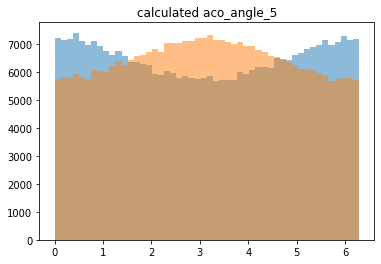

In [45]:
fig, ax = plt.subplots()
ax.hist(ps_aco_5, bins=50, alpha=0.5)
ax.hist(sm_aco_5, bins=50, alpha=0.5)
plt.title('calculated aco_angle_5')

Text(0.5, 1.0, 'given aco_angle_5')

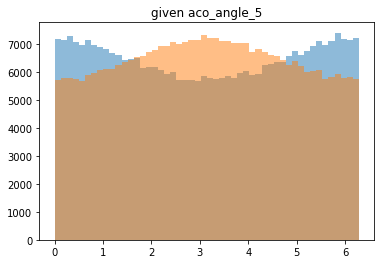

In [20]:
fig, ax = plt.subplots()
ax.hist(filter_acos(aco_5_ps.to_numpy()), bins=50, alpha=0.5)
ax.hist(filter_acos(aco_5_sm.to_numpy()), bins=50, alpha=0.5)
plt.title('given aco_angle_5')

### aco_angle_7

In [90]:
sm_aco_7 = calculate_aco_angles(df_sm, which_aco_angle=7)
ps_aco_7 = calculate_aco_angles(df_ps, which_aco_angle=7)

finished element 0
finished element 100000
finished element 200000
finished element 300000
finished element 0
finished element 100000
finished element 200000
finished element 300000


Text(0.5, 1.0, 'calculated aco_angle_7')

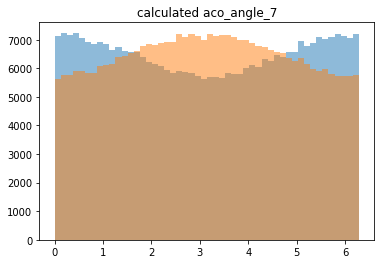

In [92]:
fig, ax = plt.subplots()
ax.hist(ps_aco_7, bins=50, alpha=0.5)
ax.hist(sm_aco_7, bins=50, alpha=0.5)
plt.title('calculated aco_angle_7')

Text(0.5, 1.0, 'given aco_angle_7')

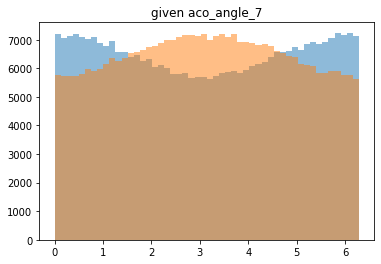

In [89]:
fig, ax = plt.subplots()
ax.hist(filter_acos(aco_7_ps.to_numpy()), bins=50, alpha=0.5)
ax.hist(filter_acos(aco_7_sm.to_numpy()), bins=50, alpha=0.5)
plt.title('given aco_angle_7')

# 2. Rho-a1 Channel

### rho-a1 channel aco_angle_1

This seems to make sense...

In [11]:
rhoa1_sm_aco_1 = calculate_aco_angles(df_rhoa1_sm, which_aco_angle='rhoa1-1')
rhoa1_ps_aco_1 = calculate_aco_angles(df_rhoa1_ps, which_aco_angle='rhoa1-1')

C:\Users\krist\anaconda3\lib\site-packages\pylorentz\__init__.py:366: ComplexWarning: Casting complex values to real discards the imaginary part
  B[0, 1:, ] = bp
C:\Users\krist\anaconda3\lib\site-packages\pylorentz\__init__.py:367: ComplexWarning: Casting complex values to real discards the imaginary part
  B[1:, 0, ] = bp


finished element 0


C:\Users\krist\anaconda3\lib\site-packages\ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in true_divide


finished element 100000
finished element 0
finished element 100000


C:\Users\krist\anaconda3\lib\site-packages\numpy\lib\histograms.py:836: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\krist\anaconda3\lib\site-packages\numpy\lib\histograms.py:837: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\krist\anaconda3\lib\site-packages\numpy\lib\histograms.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
C:\Users\krist\anaconda3\lib\site-packages\matplotlib\transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
C:\Users\krist\anaconda3\lib\site-packages\matplotlib\transforms.py:1959: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


Text(0.5, 1.0, 'calculated aco_angle ?1? for rho-a1 channel')

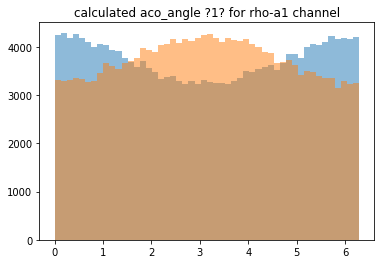

In [12]:
fig, ax = plt.subplots()
ax.hist(rhoa1_ps_aco_1, bins=50, alpha=0.5)
ax.hist(rhoa1_sm_aco_1, bins=50, alpha=0.5)
plt.title('calculated aco_angle ?1? for rho-a1 channel')

Text(0.5, 1.0, 'given aco_angle_1 in rho-a1 channel')

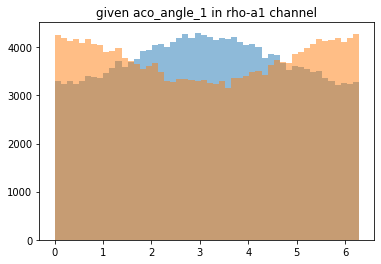

In [15]:
# THERE IS NOTHING TO COMPARE THIS TO!!! OR MAYBE THERE IS?
fig, ax = plt.subplots()
ax.hist(filter_acos(aco_1_ps_rhoa1.to_numpy()), bins=50, alpha=0.5)
ax.hist(filter_acos(aco_1_sm_rhoa1.to_numpy()), bins=50, alpha=0.5)
plt.title('given aco_angle_1 in rho-a1 channel')

### rho-a1 channel aco_angle_2

This looks similar to ?1?, but it could make sense.

In [16]:
rhoa1_sm_aco_2 = calculate_aco_angles(df_rhoa1_sm, which_aco_angle='rhoa1-2')
rhoa1_ps_aco_2 = calculate_aco_angles(df_rhoa1_ps, which_aco_angle='rhoa1-2')

finished element 0


C:\Users\krist\anaconda3\lib\site-packages\ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in true_divide


finished element 100000
finished element 0
finished element 100000


Text(0.5, 1.0, 'calculated aco_angle ?2? for rho-a1 channel')

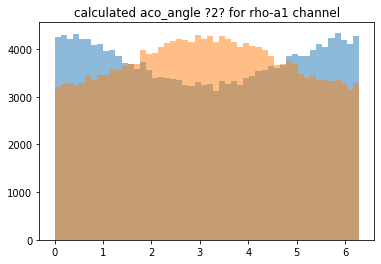

In [17]:
fig, ax = plt.subplots()
ax.hist(rhoa1_ps_aco_2, bins=50, alpha=0.5)
ax.hist(rhoa1_sm_aco_2, bins=50, alpha=0.5)
plt.title('calculated aco_angle ?2? for rho-a1 channel')

### rho-a1 channel aco_angle_3

This gives a nice distribution, but theoretically it doesn't make sense to mix these particles.

In [18]:
rhoa1_sm_aco_3 = calculate_aco_angles(df_rhoa1_sm, which_aco_angle='rhoa1-3')
rhoa1_ps_aco_3 = calculate_aco_angles(df_rhoa1_ps, which_aco_angle='rhoa1-3')

finished element 0


C:\Users\krist\anaconda3\lib\site-packages\ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in true_divide


finished element 100000
finished element 0
finished element 100000


Text(0.5, 1.0, 'calculated aco_angle ?3? for rho-a1 channel')

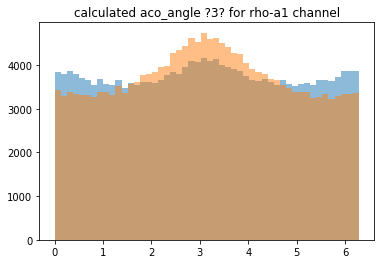

In [19]:
fig, ax = plt.subplots()
ax.hist(rhoa1_ps_aco_3, bins=50, alpha=0.5)
ax.hist(rhoa1_sm_aco_3, bins=50, alpha=0.5)
plt.title('calculated aco_angle ?3? for rho-a1 channel')

### rho-a1 channel aco_angle_4

Let's think this through:

We have pi_1, pi_2, pi0_1, pi2_2, pi3_2. pi always has opposite charge to pi2 and pi3.

The products are a charged rho and a charged a1.

The first charged rho could be eg. pi_2+pi0_1.

a1 is made up of a neutral rho and one other particle, but is overall charged, so it could be that its neutral rho is pi_1+pi2_2 or pi_1+pi3_2, and what gives it the overall charge is pi2_2 or pi3_2.

In [25]:
rhoa1_sm_aco_4 = calculate_aco_angles(df_rhoa1_sm, which_aco_angle='rhoa1-4')
rhoa1_ps_aco_4 = calculate_aco_angles(df_rhoa1_ps, which_aco_angle='rhoa1-4')

finished element 0


C:\Users\krist\anaconda3\lib\site-packages\ipykernel_launcher.py:130: RuntimeWarning: invalid value encountered in true_divide


finished element 100000
finished element 0
finished element 100000


Text(0.5, 1.0, 'calculated aco_angle ?4? for rho-a1 channel')

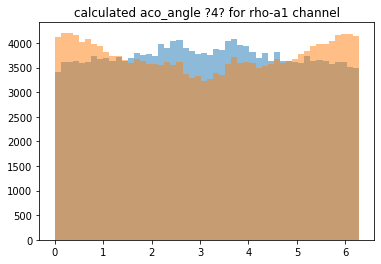

In [26]:
fig, ax = plt.subplots()
ax.hist(rhoa1_ps_aco_4, bins=50, alpha=0.5)
ax.hist(rhoa1_sm_aco_4, bins=50, alpha=0.5)
plt.title('calculated aco_angle ?4? for rho-a1 channel')

### rho-a1 channel aco_angle_5

The same thought process as the previous (?4?), but exchanging pi2 and pi3

C:\Users\krist\anaconda3\lib\site-packages\ipykernel_launcher.py:175: RuntimeWarning: invalid value encountered in sqrt
C:\Users\krist\anaconda3\lib\site-packages\ipykernel_launcher.py:193: RuntimeWarning: invalid value encountered in true_divide


finished element 0
finished element 100000
finished element 0
finished element 100000


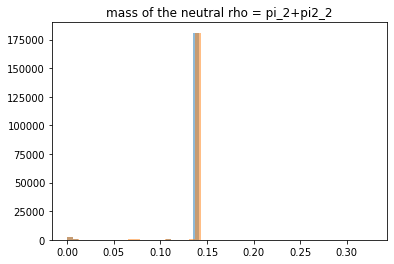

In [35]:
rhoa1_sm_aco_5 = calculate_aco_angles(df_rhoa1_sm, which_aco_angle='rhoa1-5')
rhoa1_ps_aco_5 = calculate_aco_angles(df_rhoa1_ps, which_aco_angle='rhoa1-5')

Text(0.5, 1.0, 'neutral rho = pi_2+pi2_2')

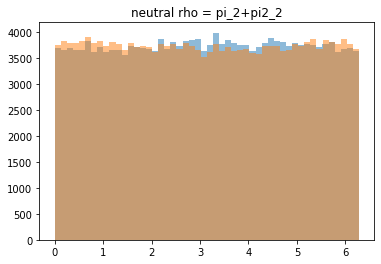

In [36]:
fig, ax = plt.subplots()
ax.hist(rhoa1_ps_aco_5, bins=50, alpha=0.5)
ax.hist(rhoa1_sm_aco_5, bins=50, alpha=0.5)
#plt.title('calculated aco_angle ??? for rho-a1 channel')
plt.title('neutral rho = pi_2+pi2_2')

### Danny's aco_angle

In [13]:
rhoa1_sm_aco_Danny = calculate_aco_angles(df_rhoa1_sm, which_aco_angle='rhoa1-Danny')
rhoa1_ps_aco_Danny = calculate_aco_angles(df_rhoa1_ps, which_aco_angle='rhoa1-Danny')

C:\Users\krist\anaconda3\lib\site-packages\pylorentz\__init__.py:366: ComplexWarning: Casting complex values to real discards the imaginary part
  B[0, 1:, ] = bp
C:\Users\krist\anaconda3\lib\site-packages\pylorentz\__init__.py:367: ComplexWarning: Casting complex values to real discards the imaginary part
  B[1:, 0, ] = bp


finished element 0


C:\Users\krist\anaconda3\lib\site-packages\ipykernel_launcher.py:189: RuntimeWarning: invalid value encountered in true_divide


finished element 100000
finished element 0
finished element 100000


C:\Users\krist\anaconda3\lib\site-packages\numpy\lib\histograms.py:836: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\krist\anaconda3\lib\site-packages\numpy\lib\histograms.py:837: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\krist\anaconda3\lib\site-packages\numpy\lib\histograms.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
C:\Users\krist\anaconda3\lib\site-packages\matplotlib\transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
C:\Users\krist\anaconda3\lib\site-packages\matplotlib\transforms.py:1959: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


Text(0.5, 1.0, "rhoa1 aco_angle Danny's formula")

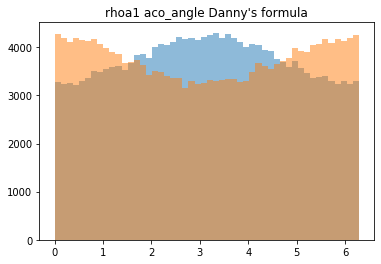

In [14]:
fig, ax = plt.subplots()
ax.hist(rhoa1_ps_aco_Danny, bins=50, alpha=0.5)
ax.hist(rhoa1_sm_aco_Danny, bins=50, alpha=0.5)
plt.title('rhoa1 aco_angle Danny\'s formula')

### Rho-rho again - Check that we get the same if we exchange particle 1 and particle 2 in the input

We get the same looking histogram, but the individual values are not the same.

In [15]:
sm_aco_5_switched = calculate_aco_angles(df_sm, which_aco_angle='5-switched')
ps_aco_5_switched = calculate_aco_angles(df_ps, which_aco_angle='5-switched')

finished element 0
finished element 100000
finished element 200000
finished element 300000
finished element 0
finished element 100000
finished element 200000
finished element 300000


Text(0.5, 1.0, 'calculated aco_angle_5 with switched p1 and p2')

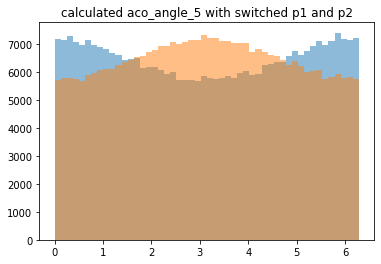

In [25]:
fig, ax = plt.subplots()
ax.hist(ps_aco_5_switched, bins=50, alpha=0.5)
ax.hist(sm_aco_5_switched, bins=50, alpha=0.5)
plt.title('calculated aco_angle_5 with switched p1 and p2')

In [21]:
print(ps_aco_5[:10])
print(ps_aco_5_switched[:10])
# this distribution looks the same, but the particles are not exactly the same

[2.572347146447192, 2.836377634321125, 1.7935796196255773, 4.3865802770628495, 2.2488566087238233, 3.6918350562844178, 2.892169254814508, 3.0311960388240626, 2.240072257477072, 0.4195788471375962]
[3.7108381607323944, 3.4468076728584687, 4.489605687554001, 1.8966050301167243, 4.034328698455777, 2.59135025089519, 3.3910160523651087, 3.2519892683555276, 4.043113049702518, 5.863606460041971]


### switching 1 and 2 but also switching 3 and 4

In [42]:
sm_aco_5_double_switched = calculate_aco_angles(df_sm, which_aco_angle='5-double-switched')
ps_aco_5_double_switched = calculate_aco_angles(df_ps, which_aco_angle='5-double-switched')

finished element 0
finished element 100000
finished element 200000
finished element 300000
finished element 0
finished element 100000
finished element 200000
finished element 300000


Text(0.5, 1.0, 'calculated aco_angle_5 with switched p1 and p2 and also switched p3 and p4')

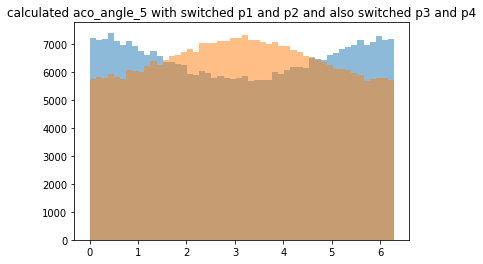

In [43]:
fig, ax = plt.subplots()
ax.hist(ps_aco_5_double_switched, bins=50, alpha=0.5)
ax.hist(sm_aco_5_double_switched, bins=50, alpha=0.5)
plt.title('calculated aco_angle_5 with switched p1 and p2 and also switched p3 and p4')

In [46]:
print(ps_aco_5[:10])
print(ps_aco_5_double_switched[:10])
# good these are exactly the same! :-)

[2.572347146447192, 2.836377634321125, 1.7935796196255773, 4.3865802770628495, 2.2488566087238233, 3.6918350562844178, 2.892169254814508, 3.0311960388240626, 2.240072257477072, 0.4195788471375962]
[2.572347146447192, 2.836377634321125, 1.7935796196255773, 4.3865802770628495, 2.2488566087238233, 3.6918350562844178, 2.892169254814508, 3.0311960388240626, 2.240072257477072, 0.4195788471375962]


### Rho-a1 again - Try out aco_angle_6 formula with SV instead of IP

In [38]:
ps_aco_6_sv = calculate_aco_angles(df_rhoa1_ps, which_aco_angle='6-sv')
sm_aco_6_sv = calculate_aco_angles(df_rhoa1_sm, which_aco_angle='6-sv')

finished element 0


C:\Users\krist\anaconda3\lib\site-packages\ipykernel_launcher.py:174: RuntimeWarning: invalid value encountered in true_divide


finished element 100000
finished element 0
finished element 100000


In [39]:
(df_rhoa1_ps['sv_x_1'] == 0).all()

True

Text(0.5, 1.0, 'calculated aco_angle_6 analogue for rho-a1 channel')

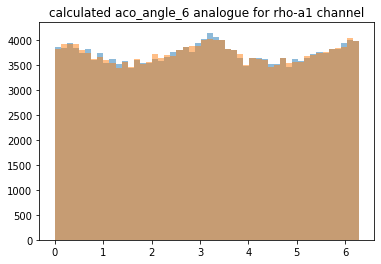

In [41]:
fig, ax = plt.subplots()
ax.hist(ps_aco_6_sv, bins=50, alpha=0.5)
ax.hist(sm_aco_6_sv, bins=50, alpha=0.5)
plt.title('calculated aco_angle_6 analogue for rho-a1 channel')